In [2]:
# import holy panda
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# make plots pretty
import matplotlib.pyplot as plt
%matplotlib inline
# list all parameters by "print(plt.rcParams)" command
plt.rcParams['figure.figsize'] = (7.5, 7.5)
plt.rcParams['font.size'] = 15
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'w'

In [4]:
# generating range of points
a, b = (1.,2.)
N = 100
n = 1
x = pd.np.linspace(a, b, N+1)

In [5]:
# generating jittery linear function y = kx+b
k, b = (1.5, 1.0)
y = k*x+b
noise = 0.1
y += pd.np.random.normal(loc=0., scale=noise, size=len(x))
df = pd.DataFrame(zip(x,y), columns=['x','y'])

In [10]:
# function that adds slope and bias columns to argument dataframe 
# for N-point moving window
# http://www.clemson.edu/ces/phoenix/tutorials/excel/regression.html
def moving_linear_regression(data, N=10):
    _df = data[[0,1]].loc[:,]
    _df.columns = ('x','y')
    _df['s_x']  = 0.
    _df['s_y']  = 0.
    _df['s_xy'] = 0.
    _df['s_xx'] = 0.
    _df['s_yy'] = 0.
    for i in range(N):
        _x = _df.x.shift(i)
        _y = _df.y.shift(i)
        _df.s_x += _x
        _df.s_y += _y
        _df.s_xy += _x*_y
        _df.s_xx += _x*_x
        _df.s_yy += _y*_y
    k  = N*_df.s_xy-_df.s_x*_df.s_y
    k /= N*_df.s_xx-_df.s_x*_df.s_x
    data['k'] = k
    data['b'] = (_df.s_y-k*_df.s_x)/N
    r = N*_df.s_xy-_df.s_x*_df.s_y
    r /= pd.np.sqrt(N*_df.s_xx-_df.s_x*_df.s_x)
    r /= pd.np.sqrt(N*_df.s_yy-_df.s_y*_df.s_y)
    data['r'] = r
    del _df

In [11]:
# adding dataframe columns for coefficients from moving window linead regression
moving_linear_regression(df, 75) # the size of the moving window N - fun to play with 
# adding dataframe column for modeled value of resposnse
df['reg'] = k*df.x+df.b

In [12]:
# evaluate the noise over nonnull regression predictions
select = df.reg.notnull()
print sum(select), (df[select].y-df[select].reg).std()

27 0.10401279534


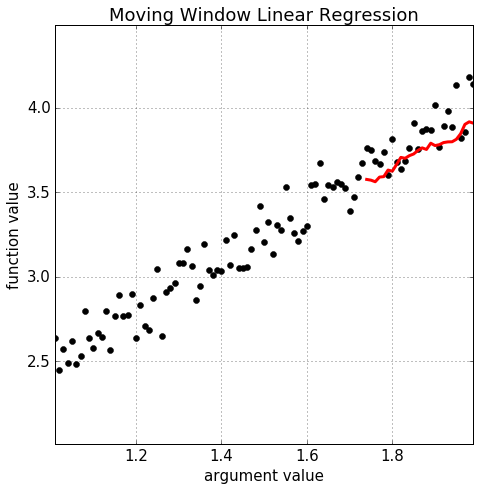

In [13]:
# plotting the data points and moving regression
plt.plot(df.x,df.y, linestyle=' ', marker='o', color='k')
plt.plot(df.x,df.reg, linewidth=3, color='r')
plt.xlim(1.01,1.99)
plt.ylim(2.01,4.49)
plt.title("Moving Window Linear Regression")
plt.xlabel("argument value")
plt.ylabel("function value");